In [1]:
%matplotlib inline


# Cursor Demo


This example shows how to use Matplotlib to provide a data cursor.  It uses
Matplotlib to draw the cursor and may be a slow since this requires redrawing
the figure with every mouse move.

Faster cursoring is possible using native GUI drawing, as in
:doc:`/gallery/user_interfaces/wxcursor_demo_sgskip`.

The mpldatacursor__ and mplcursors__ third-party packages can be used to
achieve a similar effect.

__ https://github.com/joferkington/mpldatacursor
__ https://github.com/anntzer/mplcursors


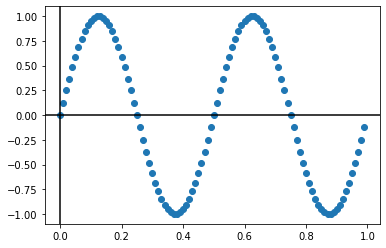

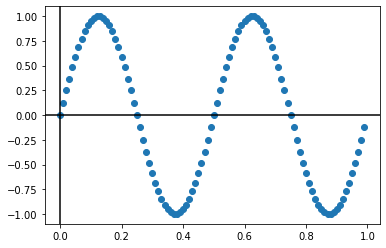

In [3]:
import matplotlib.pyplot as plt
import numpy as np


class Cursor(object):
    def __init__(self, ax):
        self.ax = ax
        self.lx = ax.axhline(color='k')  # the horiz line
        self.ly = ax.axvline(color='k')  # the vert line

        # text location in axes coords
        self.txt = ax.text(0.7, 0.9, '', transform=ax.transAxes)

    def mouse_move(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata
        # update the line positions
        self.lx.set_ydata(y)
        self.ly.set_xdata(x)

        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
        self.ax.figure.canvas.draw()


class SnaptoCursor(object):
    """
    Like Cursor but the crosshair snaps to the nearest x, y point.
    For simplicity, this assumes that *x* is sorted.
    """

    def __init__(self, ax, x, y):
        self.ax = ax
        self.lx = ax.axhline(color='k')  # the horiz line
        self.ly = ax.axvline(color='k')  # the vert line
        self.x = x
        self.y = y
        # text location in axes coords
        self.txt = ax.text(0.7, 0.9, '', transform=ax.transAxes)

    def mouse_move(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata
        indx = min(np.searchsorted(self.x, x), len(self.x) - 1)
        x = self.x[indx]
        y = self.y[indx]
        # update the line positions
        self.lx.set_ydata(y)
        self.ly.set_xdata(x)

        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
        print('x=%1.2f, y=%1.2f' % (x, y))
        self.ax.figure.canvas.draw()


t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s, 'o')
cursor = Cursor(ax)
fig.canvas.mpl_connect('motion_notify_event', cursor.mouse_move)

fig, ax = plt.subplots()
ax.plot(t, s, 'o')
snap_cursor = SnaptoCursor(ax, t, s)
fig.canvas.mpl_connect('motion_notify_event', snap_cursor.mouse_move)

plt.ion()
plt.show()